In [15]:
#pip install folium

In [16]:
import pandas as pd
import folium
import webbrowser
from IPython.display import display
import torch
from torch_geometric.data import Data
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

In [17]:
file_path = 'gauge_information.xlsx'
file_path


'gauge_information.xlsx'

In [18]:
df = pd.read_excel(file_path)
df

,HUC_02,GAGE_ID,GAUGE_NAME,LAT,LONG,DRAINAGE AREA (KM^2),Unnamed: 6,Unnamed: 7
0,1,1013500,"Fish River near Fort Kent, M...",47.23739,-68.58264,2252.70,NaN,NaN
1,1,1022500,"Narraguagus River at Cherryfield, M...",44.60797,-67.93524,573.60,NaN,NaN
2,1,1030500,"Mattawamkeag River near Mattawamkeag, M...",45.50097,-68.30596,3676.17,NaN,NaN
3,1,1031500,"Piscataquis River near Dover-Foxcroft, M...",45.17501,-69.31470,769.05,NaN,NaN
4,1,1047000,"Carrabassett River near North Anson, M...",44.86920,-69.95510,909.10,NaN,NaN
...,...,...,...,...,...,...,...,...
666,17,14309500,WEST FORK COW CREEK NEAR GLENDALE...,42.80400,-123.61091,224.92,NaN,NaN
667,17,14316700,STEAMBOAT CREEK NEAR GLIDE...,43.34984,-122.72894,587.90,NaN,NaN
668,17,14325000,SOUTH FORK COQUILLE RIVER AT POWERS...,42.89150,-124.07065,443.07,NaN,NaN
669,17,14362250,"STAR GULCH NEAR RUCH,...",42.15401,-123.07532,41.42,NaN,NaN


In [19]:
file_path = 'gauge_information.xlsx'
df = pd.read_excel(file_path)
m = folium.Map(zoom_start=2)
locations = []

#markers to collect locations
for idx, row in df.iterrows():
    location = [row['LAT'], row['LONG']]
    locations.append(location)
    folium.Marker(
        location=location,
        popup=row['GAUGE_NAME']
    ).add_to(m)

m.fit_bounds(locations)




# we need to know the bounds of all the markers
#Markers are  simply visual indicators placed on a map to represent a specific location or point of interest
#in our case the guages/basins are our point of interest

In [6]:
m.fit_bounds(locations)
display(m)

This is good but we are interested in Idaho so we will have to filter the dataframe to show on the maps the guage names that have Idaho, in the dataset, it is represented as ID.

**We can keep changing the coordinates by using the list of latitude and longitudes provided here [Lat and Long list of states in the US](https://www.latlong.net/category/states-236-14.html), we will still use the code like we did above, its just a continuation**

In [21]:

# since 'GAGE_ID' is a column in our DataFrame 'df'we just need to

#filter the DataFrame to include only rows where 'GAUGE_NAME' contains 'ID'
df_idaho = df[df['GAUGE_NAME'].str.contains('ID', na=False)]

#We  initialize the folium map focused on the geographical center of Idaho
idaho_center =[44.0682, -114.7420]  # Approximate center of Idaho, got from the link above
m = folium.Map(location=idaho_center, zoom_start=6)

#we will create two lists, one for locations the other one to collect the gauge_Id, gauge name etc
# List to collect all the locations in Idaho
locations = []


basin_info = []
#we want to collect the locations of each gaugew in idaho, just continued this code from above

for idx, row in df_idaho.iterrows():
    location = [row['LAT'], row['LONG']]
    locations.append(location)
    folium.Marker(
        location=location,
        popup=row['GAUGE_NAME']
    ).add_to(m)
    
    # we want to collect the basin info: GAUGE_NAME, GAGE_ID
    basin_info.append((row['GAUGE_NAME'], row['GAGE_ID']))


m.fit_bounds(locations)


display(m)


print("List of Basin IDs, Names, and GAGE_IDs in Idaho:")

for name, gage_id in basin_info:
    print(f"Name: {name}, GAGE_ID: {gage_id}")


List of Basin IDs, Names, and GAGE_IDs in Idaho:
Name:               NANTICOKE RIVER NEAR BRIDGEVILLE, DE, GAGE_ID: 1487000
Name:                    RAPIDAN RIVER NEAR CULPEPER, VA, GAGE_ID: 1667500
Name:               HOLIDAY CREEK NEAR ANDERSONVILLE, VA, GAGE_ID: 2038850
Name:                     STONY CREEK NEAR DINWIDDIE, VA, GAGE_ID: 2046000
Name:              SOUTH MAYO RIVER NEAR NETTLERIDGE, VA, GAGE_ID: 2069700
Name:         NORTH FORK BLACK CREEK NR MIDDLEBURG, FLA., GAGE_ID: 2246000
Name:                   PLUM CREEK NEAR BAINBRIDGE, IND., GAGE_ID: 3357350
Name:    S F HOLSTON RIVER AT RIVERSIDE NR CHILHOWIE, VA, GAGE_ID: 3471500
Name:                     STURGEON RIVER NEAR SIDNAW, MI, GAGE_ID: 4040500
Name:       MIDDLE BRANCH ESCANABA RIVER AT HUMBOLDT, MI, GAGE_ID: 4057800
Name:                         MIDDLE RIVER AT ARGYLE, MN, GAGE_ID: 5087500
Name:                     MIDDLE CREEK NEAR MINTURN, CO., GAGE_ID: 9066300
Name:       MERCED R A HAPPY ISLES BRIDGE NR YOSEMI

In [22]:
df_idaho = df[df['GAUGE_NAME'].str.contains('ID', na=False)]
df_idaho = df_idaho[(df_idaho['LAT'] >= 42) & (df_idaho['LAT'] <= 49) &
                    (df_idaho['LONG'] >= -116) & (df_idaho['LONG'] <= -111)]

# Initialize the folium map focused on the geographical center of Idaho
# idaho_center = [44.0682, -114.7420]  # Approximate center of Idaho
# m = folium.Map(location=idaho_center, zoom_start=6)

# Lists to collect locations and basin info
locations = []
basin_info = []

for idx, row in df_idaho.iterrows():
    location = [row['LAT'], row['LONG']]
    locations.append(location)
    folium.Marker(
        location=location,
        popup=row['GAUGE_NAME']
    ).add_to(m)
    
   
    basin_info.append((row['GAUGE_NAME'], row['GAGE_ID']))


m.fit_bounds(locations)


display(m)


print("List of Basin IDs, Names, and GAGE_IDs in Idaho:")
for name, gage_id in basin_info:
    print(f"Name: {name}, GAGE_ID: {gage_id}")


List of Basin IDs, Names, and GAGE_IDs in Idaho:
Name:   NF COEUR D ALENE R AB SHOSHONE CK NR PRICHARD ID, GAGE_ID: 12411000
Name:                         TRAPPER CREEK NR OAKLEY ID, GAGE_ID: 13083000
Name:                      SF PAYETTE RIVER AT LOWMAN ID, GAGE_ID: 13235000
Name:   LAKE FORK PAYETTE RIVER AB JUMBO CR NR MCCALL ID, GAGE_ID: 13240000
Name:       SF SALMON RIVER NR KRASSEL RANGER STATION ID, GAGE_ID: 13310700
Name:                    JOHNSON CREEK AT YELLOW PINE ID, GAGE_ID: 13313000
Name:                          LOCHSA RIVER NR LOWELL ID, GAGE_ID: 13337000
Name:                   SF CLEARWATER RIVER AT STITES ID, GAGE_ID: 13338500
Name:    NF CLEARWATER RIVER NR CANYON RANGER STATION ID, GAGE_ID: 13340600


In [23]:
#manually plotting for basins in idaho
data = {
    'GAGE_ID': [
        12411000, 13083000, 13235000, 13240000, 13310700, 
        13313000, 13337000, 13338500, 13340600
    ],
    'Name': [
        'NF COEUR D ALENE R AB SHOSHONE CK NR PRICHARD ID',
        'TRAPPER CREEK NR OAKLEY ID',
        'SF PAYETTE RIVER AT LOWMAN ID',
        'LAKE FORK PAYETTE RIVER AB JUMBO CR NR MCCALL ID',
        'SF SALMON RIVER NR KRASSEL RANGER STATION ID',
        'JOHNSON CREEK AT YELLOW PINE ID',
        'LOCHSA RIVER NR LOWELL ID',
        'SF CLEARWATER RIVER AT STITES ID',
        'NF CLEARWATER RIVER NR CANYON RANGER STATION ID'
    ],
    'LAT': [
        47.555, 42.245, 44.080, 44.951, 45.143,
        44.965, 46.146, 46.085, 46.531
    ],
    'LONG': [
        -116.134, -113.655, -115.621, -116.092, -115.735,
        -115.477, -115.600, -115.775, -115.732
    ]
}

df = pd.DataFrame(data)
map_center = [44.0682, -114.7420]  # Coordinates of Idaho 
folium_map = folium.Map(location=map_center, zoom_start=6)


for i, row in df.iterrows():
    folium.Marker(
        location=[row['LAT'], row['LONG']],
        popup=f"{row['Name']}\nGAGE_ID: {row['GAGE_ID']}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(folium_map)
folium_map.save('idaho_gages_map.html')
folium_map


**********

**How to apply a GNN**

In [11]:
file_path = 'gauge_information.xlsx'
df=pd.read_excel(file_path)
node_features = df[['LAT', 'LONG', 'DRAINAGE AREA (KM^2)']].values
node_features = torch.tensor(node_features, dtype=torch.float)

from sklearn.metrics.pairwise import haversine_distances
import numpy as np

coords = np.radians(df[['LAT', 'LONG']].values)
distances = haversine_distances(coords, coords) * 6371000/1000  

threshold = 50  #to create the distance between the edges, this is just a chosen number
edge_index = np.array(np.where(distances < threshold))
edge_index = torch.tensor(edge_index, dtype=torch.long)
data = Data(x=node_features, edge_index=edge_index)
print(data)


Data(x=[671, 3], edge_index=[2, 2017])


In [12]:
class GCN(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, 16)
        self.conv2 = GCNConv(16, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)

        return F.log_softmax(x, dim=1)
    
model = GCN(in_channels=data.num_node_features, out_channels=2)  # Assuming 2 classes for classification


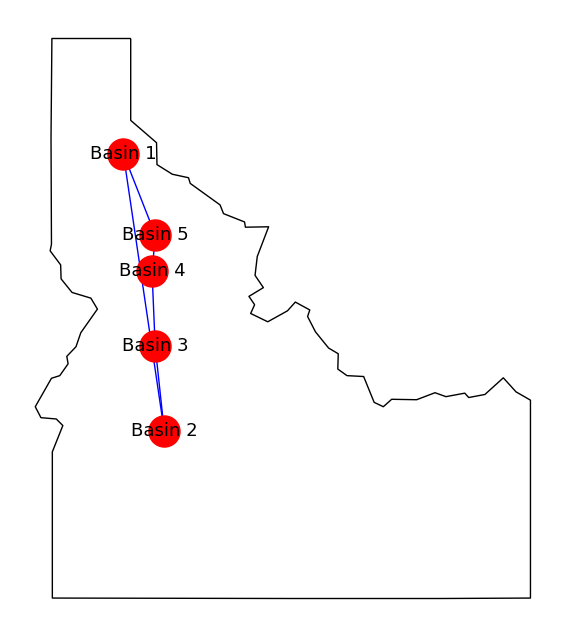

In [33]:
import matplotlib.pyplot as plt
import networkx as nx
import geopandas as gpd
from shapely.geometry import Point

# Sample basin data
basin_data = {
    'Name': [
        'Basin 1', 'Basin 2', 'Basin 3', 'Basin 4', 'Basin 5'
    ],
    'LAT': [
        47.555, 44.080, 45.143, 46.085, 46.531
    ],
    'LONG': [
        -116.134, -115.621, -115.735, -115.775, -115.732
    ]
}

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(
    basin_data, 
    geometry=gpd.points_from_xy(basin_data['LONG'], basin_data['LAT'])
)

# Load Idaho state boundary
url = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/ID.geo.json'
idaho = gpd.read_file(url)

# Create a graph
G = nx.Graph()

# Add nodes with coordinates
for i, row in gdf.iterrows():
    G.add_node(row['Name'], pos=(row['LONG'], row['LAT']))

# Define edges (connections between basins)
edges = [
    ('Basin 1', 'Basin 2'),
    ('Basin 2', 'Basin 3'),
    ('Basin 3', 'Basin 4'),
    ('Basin 4', 'Basin 5'),
    ('Basin 1', 'Basin 5')
]

# Add edges to the graph
G.add_edges_from(edges)

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))
idaho.plot(ax=ax, color='white', edgecolor='black')
gdf.plot(ax=ax, color='blue')

# Draw graph
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, ax=ax, with_labels=True, node_color='red', edge_color='blue', node_size=500, font_size=13)

plt.show()


In [28]:
pip install geopandas

  Using cached geopandas-1.0.1-py3-none-any.whl.metadata (2.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 3.4 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 13.4 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.3 MB/s eta 0:00:0000:01m00:01
  Attempting uninstall: pip
    Found existing installation: pip 24.0
    Uninstalling pip-24.0:
      Successfully uninstalled pip-24.0
Note: you may need to restart the kernel to use updated packages.
